### Step 1: Load and Explore the Data


In [21]:
import pandas as pd

# Load the dataset from the file

titanic_data = pd.read_csv("titanic T1.csv")

In [22]:
# Display the first few rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Step 2: Data Preprocessing


In [23]:
# Check for missing values
print(titanic_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [24]:
# Drop the 'Cabin' column due to a high number of missing values
titanic_data.drop('Cabin', axis=1, inplace=True)

In [25]:
# Fill missing values in 'Age' column with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [26]:
# Fill missing value in 'Fare' column with the median fare
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

In [27]:
# Convert categorical variables into numerical using one-hot encoding
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])


In [28]:
# Select relevant features and target variable
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

In [29]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,1,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,0,0,0,1
5,897,0,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,0,1,0,0,1
6,898,1,3,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,1,0,0,1,0
7,899,0,2,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,0,1,0,0,1
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,1,0,1,0,0
9,901,0,3,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,0,1,0,0,1


In [30]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Sex_female   418 non-null    uint8  
 10  Sex_male     418 non-null    uint8  
 11  Embarked_C   418 non-null    uint8  
 12  Embarked_Q   418 non-null    uint8  
 13  Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(5)
memory usage: 31.6+ KB


In [31]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535,0.363636,0.636364,0.244019,0.110048,0.645933
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103,0.481622,0.481622,0.430019,0.313324,0.478803
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875,1.000000,1.000000,0.000000,0.000000,1.000000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
 = titanic_data[features]
y = titanic_data[target]

### Step 3: Build a Predictive Model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Initialize the model
model = LogisticRegression(max_iter=1000)

In [36]:
# Fit the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
# Make predictions
y_pred = model.predict(X_test)


In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [40]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [41]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[50  0]
 [ 0 34]]


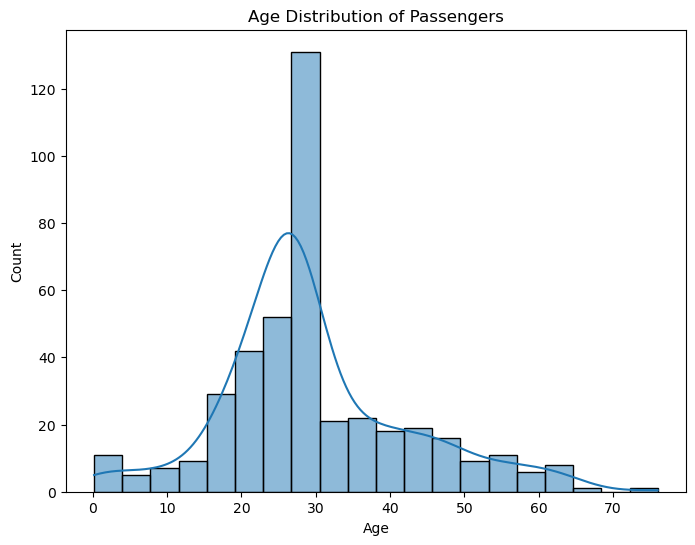

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Age'], bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Survival Count by Sex:

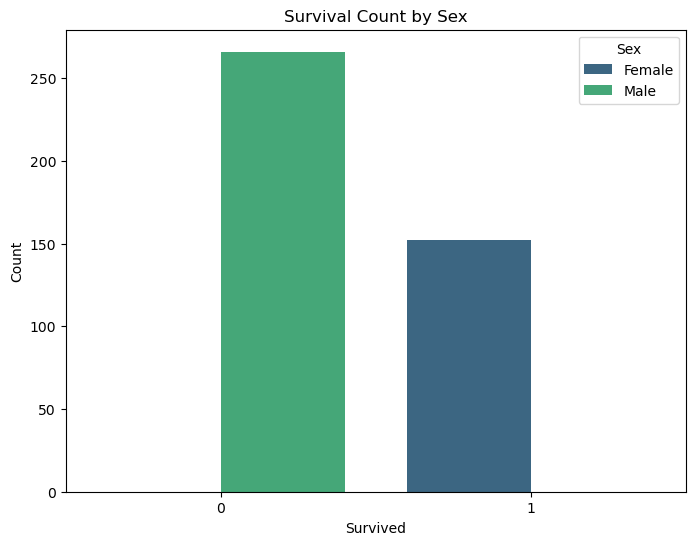

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival count by sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex_male', data=titanic_data, palette='viridis')
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right', labels=['Female', 'Male'])  # Update labels if needed
plt.show()

